# PYTHON İLE BÜYÜK VERİ - PYSPARK

### Kurulumların yapılması ve kontrol edilmesi

In [1]:
!pip install findspark

In [2]:
import findspark

In [4]:
findspark.init("C:\spark")

In [5]:
from pyspark import SparkContext

### SPARK UYGULAMASININ BAŞLATILMASI

In [6]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [8]:
# Spark bağlantısının yapılandırılması

spark = SparkSession.builder \
    .master("local") \
        .appName("pyspark_giris") \
            .getOrCreate()

# Bağlantının oluşturulması
sc = spark.sparkContext

In [9]:
sc

<SparkContext master=local appName=pyspark_giris>

In [10]:
sc.version

'3.0.1'

In [11]:
sc.appName

'pyspark_giris'

In [12]:
#### ! UYARI ! ###
# AÇILMIŞ BİR BAĞLANTIYI KAPATMADAN BİLGİSAYARI KAPATMAYIN
# YADA VAR OLAN BAĞLANTIYI SONLANDIRMADAN BAŞKA BAĞLANTILAR AÇMAYIN

In [13]:
# sc.stop()

## TEMEL DATAFRAME İŞLEMLERİ

In [14]:
# Müşteri terk modellemesi çalışması

In [16]:
spark_df = spark.read.csv("./verisetleri/churn.csv", header=True, inferSchema=True)

In [17]:
# spark ara yüzünde jobs kısmında "Completed Jobs(2)" şeklinde bazı işlemler gözükecek.

In [18]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [19]:
# Total_Purchase --> Toplam Satın Alma
# Churn --> Terketmek demek. Sınıflandırma problemi ele alacağız.

In [20]:
# spark_df ve pandas_df farklı veritipleridir.
# pandas dataframe için kullandığımız bazı fonksiyonlar çalışabilir ama çoğu çalışmaz.
# Çalışan fonksiyonların çıktıları da tamamen farklıdır.

In [21]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [22]:
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [27]:
import seaborn as sns
df = sns.load_dataset("diamonds")

In [28]:
type(df)

pandas.core.frame.DataFrame

In [29]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [30]:
spark_df.head()

Row(_c0=0, Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Churn=1)

In [31]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [32]:
spark_df.dtypes

[('_c0', 'int'),
 ('Names', 'string'),
 ('Age', 'double'),
 ('Total_Purchase', 'double'),
 ('Account_Manager', 'int'),
 ('Years', 'double'),
 ('Num_Sites', 'double'),
 ('Churn', 'int')]

In [33]:
df.ndim

2

In [34]:
# spark_df.ndim # çalışmaz

AttributeError: 'DataFrame' object has no attribute 'ndim'

 #### Verisetine ilk bakış

In [36]:
spark_df.head()

Row(_c0=0, Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Churn=1)

In [38]:
# Gözlemlerin tamamını veya belli bir sayıda gözlem
spark_df.show(3, truncate = True)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 3 rows



In [39]:
# Gözlem sayısı
spark_df.count()

900

In [40]:
# Değişken isimleri
spark_df.columns

['_c0',
 'Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Churn']

In [41]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|               _c0|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|              Churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [42]:
# Tek - bir değişkenin betimsel özellikleri
spark_df.describe("Age").show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|              900|
|   mean|41.81666666666667|
| stddev|6.127560416916251|
|    min|             22.0|
|    max|             65.0|
+-------+-----------------+



In [43]:
# Veri setinin içerisinden değişken seçimi

In [44]:
spark_df.select("Age", "Names").show()

+----+-------------------+
| Age|              Names|
+----+-------------------+
|42.0|   Cameron Williams|
|41.0|      Kevin Mueller|
|38.0|        Eric Lozano|
|42.0|      Phillip White|
|37.0|     Cynthia Norton|
|48.0|   Jessica Williams|
|44.0|        Eric Butler|
|32.0|      Zachary Walsh|
|43.0|        Ashlee Carr|
|40.0|     Jennifer Lynch|
|30.0|       Paula Harris|
|45.0|     Bruce Phillips|
|45.0|       Craig Garner|
|40.0|       Nicole Olson|
|41.0|     Harold Griffin|
|38.0|       James Wright|
|45.0|      Doris Wilkins|
|43.0|Katherine Carpenter|
|53.0|     Lindsay Martin|
|46.0|        Kathy Curry|
+----+-------------------+
only showing top 20 rows



In [45]:
# Gözlemlerden seçme işlemi

In [47]:
spark_df.filter(spark_df.Age > 40).count()

524

In [48]:
# Churn değişkeninin hangi sınıfından kaç tane var
spark_df.groupby("Churn").count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [49]:
# İleri aggregation işlemleri

In [50]:
spark_df.groupby("Churn").agg({"Age":"mean"}).show()

+-----+-----------------+
|Churn|         avg(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



## SQL İŞLEMLERİ

In [51]:
# spark dataframe i SQL tablosuna dönüşürme 
# eski fonksiyon
spark_df.registerTempTable("tbl_df")

In [64]:
# spark dataframe i SQL tablosuna dönüşürme 
# yeni fonksiyon
# spark dataframe i geçici view tablosuna dönüştürme işlemi, sql kodlarıyla kullanabilmek için. Bu tablo üzerinden SQL işlemlerini gerçekleştirmiş olacağız.
spark_df.createOrReplaceTempView("tbl_df")

In [54]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [55]:
spark.sql("show tables").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        |   tbl_df|       true|
+--------+---------+-----------+



In [56]:
# spark arayüzünde gerçekleşen işlemleri kontro edin

In [57]:
# spark arayüzünde Storage de RDDS oluşması gerekiyor du. Örnekte oluşmadı.

In [65]:
 spark.sql("select Age from tbl_df").show()

+----+
| Age|
+----+
|42.0|
|41.0|
|38.0|
|42.0|
|37.0|
|48.0|
|44.0|
|32.0|
|43.0|
|40.0|
|30.0|
|45.0|
|45.0|
|40.0|
|41.0|
|38.0|
|45.0|
|43.0|
|53.0|
|46.0|
+----+
only showing top 20 rows



In [66]:
spark.sql("select Age from tbl_df").show(5)

+----+
| Age|
+----+
|42.0|
|41.0|
|38.0|
|42.0|
|37.0|
+----+
only showing top 5 rows



In [67]:
spark.sql("select Churn, mean(Age) from tbl_df group by Churn").show()

+-----+-----------------+
|Churn|        mean(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



## BÜYÜK VERİDE GÖRSELLEŞTİRME

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
sns.barplot(x = "Churn", y = spark_df.Churn.index, data = spark_df)

AttributeError: 'DataFrame' object has no attribute 'get'

In [71]:
# Yukarıdaki hatanın sebebi :
# Fonksiyonun içerisindeki argümanlar ve arka tarafta çalışan fonksiyonlar pandas dataframe e göre çalışmaktadır. Bu sebeple büyük veri görselleştirme söz konusu olduğunda ÖNCE SONUÇLARI İNDİRGEMEMİZ ve İNDİRGEME İŞLEMLERİNDEN SONRA İNDİRGENEN PANDAS DATAFRAME ÜZERİNDEN BU İŞLEMLERİ GERÇEKLEŞTİRMEMİZ GEREKİYOR.

In [73]:
# spark dataframe i pandas dataframe e çevirmek
sdf = spark_df.toPandas()

In [74]:
sdf.head()

,_c0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


In [75]:
# Not : Yukarıdaki verilerde bulunan _c0 hatalı değişkendir. Şimdilik atlıyoruz bunu

<AxesSubplot:xlabel='Churn'>

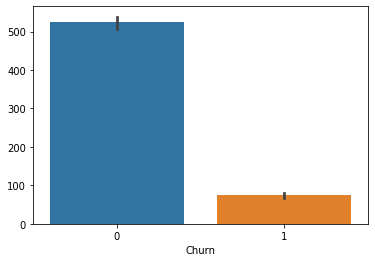

In [76]:
sns.barplot(x="Churn", y=sdf.Churn.index, data=sdf)

In [77]:
# Yapılacak olan işlem her ne olacaksa;
# Bu büyük bir bulut ortamındaki 5, 10 makinalı spark cluster da olabilir,
# Kendi işyeriniz için kurmuş olduğunuz bir spark cluster da olabilir,
# Yada buradaki örnek gibi kişisel bilgisayarınız da olabilir.

# Netice itibariyle oluşturmuş olduğunuz spark dataframe i varsa ve eğer bir görselleştirme işlemi yapmak istiyorsanız - ki büyük veri ortamlarında yer alan verilerin boyutları oldukça büyük olacaktır - eğer bu verileri önce spark dataframe i tarafında yada sql tarafında indirgerseniz ondan sonra bunun mutlak değerlerini buraya getirirseniz çok daha kolay bir şekilde görselleştirme işlemlemini gerçekleştirebilirsiniz.

# Biz örnekte verisetinin boyutu çok çok büyük olmadığından dolayı tüm verisetini direkt pandas dataframe çevirip bunun üzerinden göreselleştirme işlemini gerçekleştirdik.

In [78]:
# İNDİRGEME İŞLEMİ İLE GÖRSELLEŞTİRME

In [79]:
a = spark_df.groupby("Churn").count().toPandas()

In [80]:
a

,Churn,count
0,1,150
1,0,750


In [81]:
type(a)

pandas.core.frame.DataFrame

In [82]:
# Büyük veri nasıl görselleştirilir ? Büyük veriyi local makinemizde görselleştirmemiz mümkün değildir. Zaten veri büyük olduğu için localimizde işleyemediğimiz veridir.
# Önce indirgeme işlemi yapılmalı sonra pandas dataframe dönüştürülmesi gerekiyor.

In [83]:
# İNDİRGEME NEDİR ? : Verinin içerisinden belli bir kısmın alınması işlemidir.

In [ ]:
sc.stop()